In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\evulvate internship\Titanic-Dataset.csv")


In [3]:
# Display first few rows
print("----- FIRST 5 ROWS -----")
print(df.head())


----- FIRST 5 ROWS -----
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [4]:
#  Explore basic info
print("\n----- DATA INFO -----")
print(df.info())

print("\n----- SUMMARY STATISTICS -----")
print(df.describe(include='all'))

print("\n----- MISSING VALUES -----")
print(df.isnull().sum())


----- DATA INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

----- SUMMARY STATISTICS -----
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN     

In [6]:
#  Handle Missing Values


if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop rows with too many missing values (if any)
df = df.dropna(thresh=len(df.columns) - 3)

print("\n----- AFTER HANDLING MISSING VALUES -----")
print(df.isnull().sum())



----- AFTER HANDLING MISSING VALUES -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [7]:
#  Encode Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())

# Apply Label Encoding or One-Hot Encoding depending on number of categories
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n----- AFTER ENCODING -----")
print(df_encoded.head())


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

----- AFTER ENCODING -----
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Name_Abelson, Mr. Samuel  ...  Cabin_F G

In [8]:
# Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("\n----- AFTER STANDARDIZATION -----")
print(df_encoded.head())



----- AFTER STANDARDIZATION -----
   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0    -1.730108 -0.789272  0.827377 -0.565736  0.432793 -0.473674 -0.502445   
1    -1.726220  1.266990 -1.566107  0.663861  0.432793 -0.473674  0.786845   
2    -1.722332  1.266990  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   
3    -1.718444  1.266990 -1.566107  0.433312  0.432793 -0.473674  0.420730   
4    -1.714556 -0.789272  0.827377  0.433312 -0.474545 -0.473674 -0.486337   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Name_Abelson, Mr. Samuel

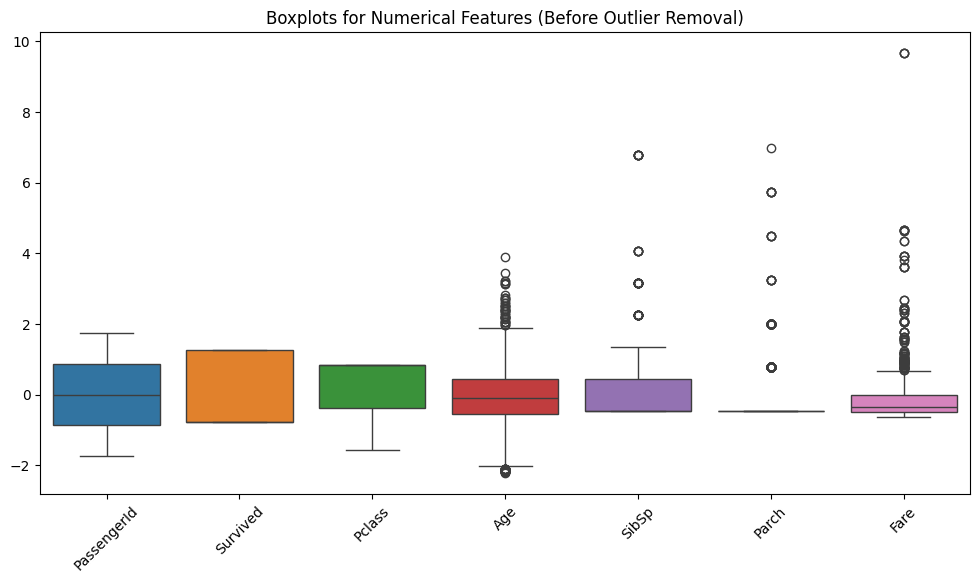

In [9]:
#  Visualize Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded[numeric_cols])
plt.title("Boxplots for Numerical Features (Before Outlier Removal)")
plt.xticks(rotation=45)
plt.show()


In [10]:
#  Remove Outliers (using IQR method)
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df_cleaned = remove_outliers_iqr(df_encoded, numeric_cols)

print(f"\nOriginal Shape: {df_encoded.shape}")
print(f"After Outlier Removal: {df_cleaned.shape}")


Original Shape: (891, 1726)
After Outlier Removal: (561, 1726)


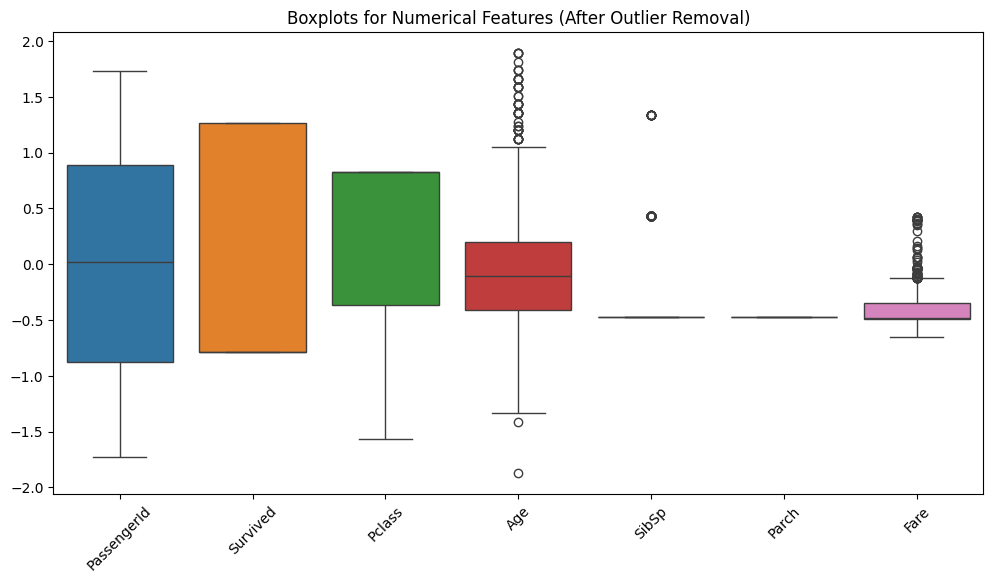

In [11]:
# Visualize After Cleaning
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title("Boxplots for Numerical Features (After Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Save the cleaned dataset
df_cleaned.to_csv("Titanic_Cleaned.csv", index=False)
print("\nCleaned dataset saved as 'Titanic_Cleaned.csv'")



Cleaned dataset saved as 'Titanic_Cleaned.csv'
